# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>

# <span style="color:red">Binary Classification</span>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
photo = X.loc[0].values.reshape(28,28)

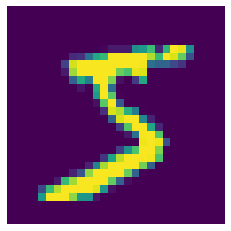

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(photo)
plt.axis("off")
plt.show()

In [6]:
y[0]

'5'

In [20]:
import numpy as np
y = y.astype(np.uint8)
y[0]

5

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [22]:
ytrain5 = y_train == 5

In [23]:
ytest5 = y_test == 5

In [24]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state=20)

In [25]:
model.fit(X_train, ytrain5)

SGDClassifier(random_state=20)

In [26]:
model.predict(X[:9])

array([ True, False, False, False, False, False, False, False, False])

In [27]:
ytrain5[:9]

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: class, dtype: bool

In [28]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3, random_state=33, shuffle=True)

for train_index, test_index in skfold.split(X_train, ytrain5):

    clone_clf = model

    X_train_folds = X_train.loc[train_index]
    y_train_folds = ytrain5[train_index]

    X_test_fold = X_train.loc[test_index]
    y_test_fold = ytrain5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)

    y_pred = clone_clf.predict(X_test_fold)

    n_correct = sum(y_pred == y_test_fold)

    print(n_correct / len(y_pred))

0.96795
0.96885
0.9595


In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, ytrain5, cv=3, scoring="accuracy")

array([0.96505, 0.9675 , 0.91375])

In [32]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):

    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [33]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, ytrain5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [34]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(model, X_train, ytrain5, cv=3)

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix( y_train_pred, ytrain5)

array([[52695,  1190],
       [ 1884,  4231]], dtype=int64)

In [36]:
from sklearn.metrics import precision_score, recall_score

In [37]:
precision_score(ytrain5, y_train_pred)

0.6919051512673753

In [38]:
recall_score(ytrain5, y_train_pred)

0.7804833056631618

In [39]:
from sklearn.metrics import f1_score

f1_score(ytrain5, y_train_pred)

0.7335298196948682


# <span style="color:blue">Precision/Recall Tradeoff</span>

In [44]:
y_scores = model.decision_function(X.loc[0:5])

y_scores

array([  2799.11666034, -28240.37814708, -37149.71018673, -18643.26090622,
       -17972.58025111, -27825.00313971])

In [42]:
ytrain5.loc[:5]

0     True
1    False
2    False
3    False
4    False
5    False
Name: class, dtype: bool

In [46]:
y_scores = cross_val_predict(model, X_train, ytrain5, cv=3, method="decision_function")

y_scores.shape

(60000,)

In [47]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(ytrain5, y_scores)

In [48]:
recalls.shape

(59823,)

In [61]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid()
    plt.legend(loc="center right", fontsize=16)

In [59]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
print(recall_90_precision)

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

0.48146098505810736


4638.827306174002

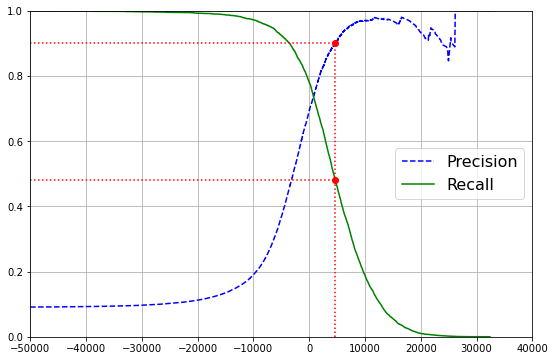

In [63]:
plt.subplots(figsize=(9,6))

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")               
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")

plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro") 

plt.axis([-50000, 40000, 0, 1])
plt.show()

In [64]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [65]:
precision_score(ytrain5, y_train_pred_90)

0.9

In [66]:
recall_score(ytrain5, y_train_pred_90)

0.48146098505810736

# <span style="color:blue">The ROC Curve (receiver operating characteristic)</span>

the ROC curve plots the true positive rate (another name
for recall) against the false positive rate. The FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate,
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.

In [67]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(ytrain5, y_scores)

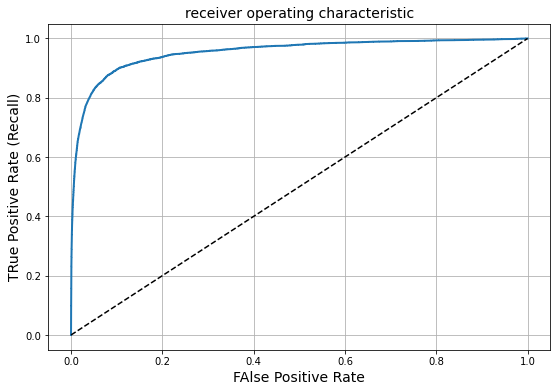

In [68]:
plt.subplots(figsize=(9,6))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

plt.title('receiver operating characteristic', size=14)
plt.xlabel('FAlse Positive Rate', size=14)
plt.ylabel('TRue Positive Rate (Recall)', size=14)

plt.grid()
plt.show()

In [69]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ytrain5, y_scores)

0.9538037160088807

Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright
corner).

### <span style="color:chocolate">RandomForestClassifier</span>

Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier. First, you need to get scores for each instance in the training set. But due to the way it works, the RandomForestClassi fier class does not have a decision_function() method. Instead it has a pre dict_proba() method. Scikit-Learn classifiers generally have one or the other. The predict_proba() method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g., 70% chance that the image represents a 5).

In [71]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=33)

y_probas_forest = cross_val_predict(forest_clf, X_train, ytrain5, cv=3, method="predict_proba")

In [72]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(ytrain5,y_scores_forest)

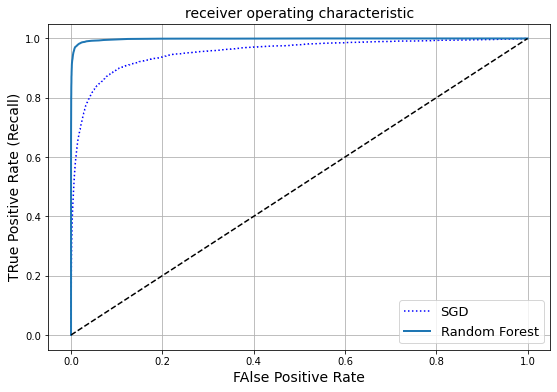

In [74]:
plt.subplots(figsize=(9,6))

plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

plt.title('receiver operating characteristic', size=14)
plt.xlabel('FAlse Positive Rate', size=14)
plt.ylabel('TRue Positive Rate (Recall)', size=14)

plt.grid()
plt.legend(loc= "lower right", fontsize = 13)
plt.show()

In [75]:
roc_auc_score(ytrain5, y_scores_forest)

0.9982396047484723

# <span style="color:red">Multiclass Classification</span>

In [76]:
model.fit(X_train, y_train)

SGDClassifier(random_state=20)

In [77]:
some_digit = X[:1].values

In [78]:
model.predict(some_digit)

array([5], dtype=uint8)

In [80]:
y[0]

5

In [82]:
some_digit_scores = model.decision_function(some_digit)

some_digit_scores

array([[-13635.58988627, -26268.59301979,  -7812.65928812,
          -675.61421886, -27437.3302543 ,   1454.05657509,
        -26330.98937691, -12185.87181873,  -8842.69023341,
         -9876.7421915 ]])

In [68]:
np.argmax(some_digit_scores)

5

In [69]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [83]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [84]:
ovo_clf.predict(some_digit)

array([5], dtype=uint8)

In [74]:
len(ovo_clf.estimators_)  # N × (N – 1) / 2

45

In [85]:
forest_clf.fit(X_train, y_train)

forest_clf.predict(some_digit)

array([5], dtype=uint8)

In [86]:
forest_clf.predict_proba(some_digit)

array([[0.  , 0.  , 0.01, 0.07, 0.  , 0.88, 0.  , 0.  , 0.03, 0.01]])

In [87]:
cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")

array([0.86825, 0.866  , 0.88185])

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(model, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\__Ayad__\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.90255, 0.8921 , 0.90695])

# <span style="color:blue">Error Analysis</span>



In [89]:
y_train_pred = cross_val_predict(model, X_train_scaled, y_train, cv=3)

C:\Users\__Ayad__\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [90]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5589,    0,   25,    6,    9,   46,   35,    6,  206,    1],
       [   0, 6409,   38,   24,    4,   45,    4,    7,  199,   12],
       [  27,   27, 5263,   90,   72,   27,   68,   39,  335,   10],
       [  23,   18,  121, 5247,    2,  207,   27,   40,  374,   72],
       [  10,   14,   50,   12, 5205,   11,   38,   25,  301,  176],
       [  28,   15,   32,  170,   54, 4476,   77,   16,  488,   65],
       [  30,   16,   47,    2,   42,   94, 5563,    3,  120,    1],
       [  20,   10,   53,   30,   51,   11,    3, 5707,  163,  217],
       [  17,   67,   47,   89,    3,  128,   26,   11, 5415,   48],
       [  23,   18,   32,   66,  118,   34,    1,  181,  318, 5158]],
      dtype=int64)

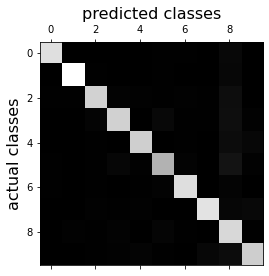

In [91]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

plt.ylabel("actual classes", size=16)
plt.title("predicted classes", size=16)
plt.show()

The 5s look slightly darker than the other digits, which could mean that there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other digits. In fact, you can verify that both are the case.

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error

In [95]:
row_sums = conf_mx.sum(axis=1, keepdims=True) # (10, 1)
print(row_sums)

norm_conf_mx = conf_mx / row_sums

[[5923]
 [6742]
 [5958]
 [6131]
 [5842]
 [5421]
 [5918]
 [6265]
 [5851]
 [5949]]


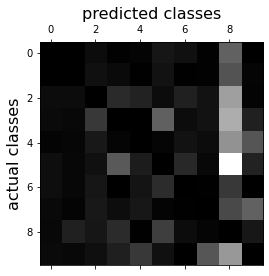

In [96]:
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

plt.ylabel("actual classes", size=16)
plt.title("predicted classes", size=16)

plt.show()

Now you can clearly see the kinds of errors the classifier makes

The column for class 8 is quite bright, which tells you that many images get misclassified as 8s. However, the row for class 8 is not that bad, telling you that actual 8s in general get properly classified as 8s. As you can see, the confusion matrix is not necessarily symmetrical. You can also see that 3s and 5s often get confused (in both directions).

# <span style="color:red">Multilabel Classification</span>

In [98]:
y_train_large = (y_train >= 7)

y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

y_multilabel[:7, :]

array([[False,  True],
       [False, False],
       [False, False],
       [False,  True],
       [ True,  True],
       [False, False],
       [False,  True]])

In [102]:
y_train[:7].values

array([5, 0, 4, 1, 9, 2, 1], dtype=uint8)

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [104]:
knn_clf.predict(some_digit) # 5

array([[False,  True]])

The digit 5 is indeed not large (False) and odd (True).

In [96]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

This assumes that all labels are equally important, which may not be the case. In particular, if you have many more pictures of Alice than of Bob or Charlie, you may want to give more weight to the classifier’s score on pictures of Alice. One simple option is to give each label a weight equal to its support (i.e., the number of instances with that target label). To do this, simply set average="weighted" in the preceding code.

# <span style="color:red">Multioutput Classification</span>

is called multioutputmulticlass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

In [105]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
y_train_mod = y_train

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_test_mod = y_test

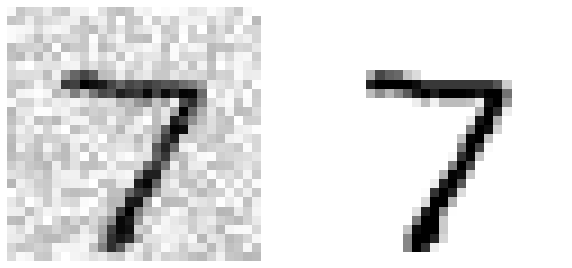

In [147]:
plt.subplots(figsize=(10, 8))

plt.subplot(121)
plt.imshow(X_test_mod[:1].values.reshape(28,28), cmap=plt.cm.binary)
plt.axis('off')

plt.subplot(122)
plt.imshow(X_test[:1].values.reshape(28,28), cmap=plt.cm.binary)
plt.axis('off')

plt.show()

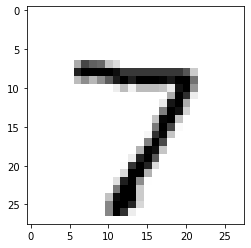

In [139]:
plt.imshow(X_test[:1].values.reshape(28,28), cmap=plt.cm.binary)


In [106]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [134]:
clean_digit = knn_clf.predict(np.array(X_test_mod.iloc[:1, :]))

clean_digit

array([7], dtype=uint8)

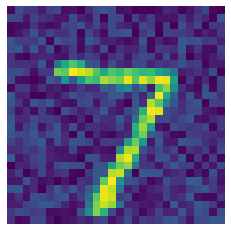

In [148]:
plt.imshow(X_test_mod[:1].values.reshape(28,28))
plt.axis('off')

plt.show()

# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>